In [29]:
import pandas as pd

In [30]:
data = pd.read_csv("opsd_germany_daily.csv")
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


this will change things to timstamp 

In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [32]:
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


Now we want to index the date

In [33]:
data = data.set_index('Date')

In [34]:
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [35]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

the frequency is set to none which measn it is not known whether the data is collected by th ehour, by day or by minute, but eyeballing the data can tell you that it is collected by day

to correct the frequency problem you can do this

In [36]:
data_freq = data.asfreq("D")
data_freq

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


Here we set the frequency to D which means a calendar day, there are others as well pretty much what we are saying is that we are telling the computer that each row is one day

to fix some of the NaN stuff you can use ffill which just means that it fills the data with the previous value in the last row

In [37]:
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


to compute weekly mean values for electricity consumption, wind and solar production 

In [38]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


the W method used for the resample is for weekly

if you wanted to resample monthly it would look the same but with the M instead of the W

In [39]:
data_monthly_mean = data[data_columns].resample('M').mean()
data_monthly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


for the maximum values you could use that instead of the mean, lets say we want to resample for monthly but we are looking for max

In [40]:
data_monthly_max = data[data_columns].resample('M').max()
data_monthly_max

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1613.31200,NaN,NaN,NaN
2006-02-28,1606.66700,NaN,NaN,NaN
2006-03-31,1545.83400,NaN,NaN,NaN
2006-04-30,1447.79800,NaN,NaN,NaN
2006-05-31,1380.17500,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1434.05200,455.379,216.117,601.010
2017-09-30,1460.61621,761.751,168.123,838.572
2017-10-31,1508.51484,819.818,123.715,846.617


lets say you wanted to compute a 7 day rolling mean

In [41]:
data_7d_roll = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_roll

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


The center means that is where they are going to put the average. Lets say you are finding the rolling mean for Jan 1 through Jan 8th the middle day is the 4th so that is where they put it

now they are going to find a 365 rolling mean

In [43]:
data_365_roll = data[data_columns].rolling(window = 365, center = True).mean()
data_365_roll

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,NaN,NaN,NaN,NaN
2017-12-28,NaN,NaN,NaN,NaN
2017-12-29,NaN,NaN,NaN,NaN


Now for the visualization

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Trends in Electricity Consumption')

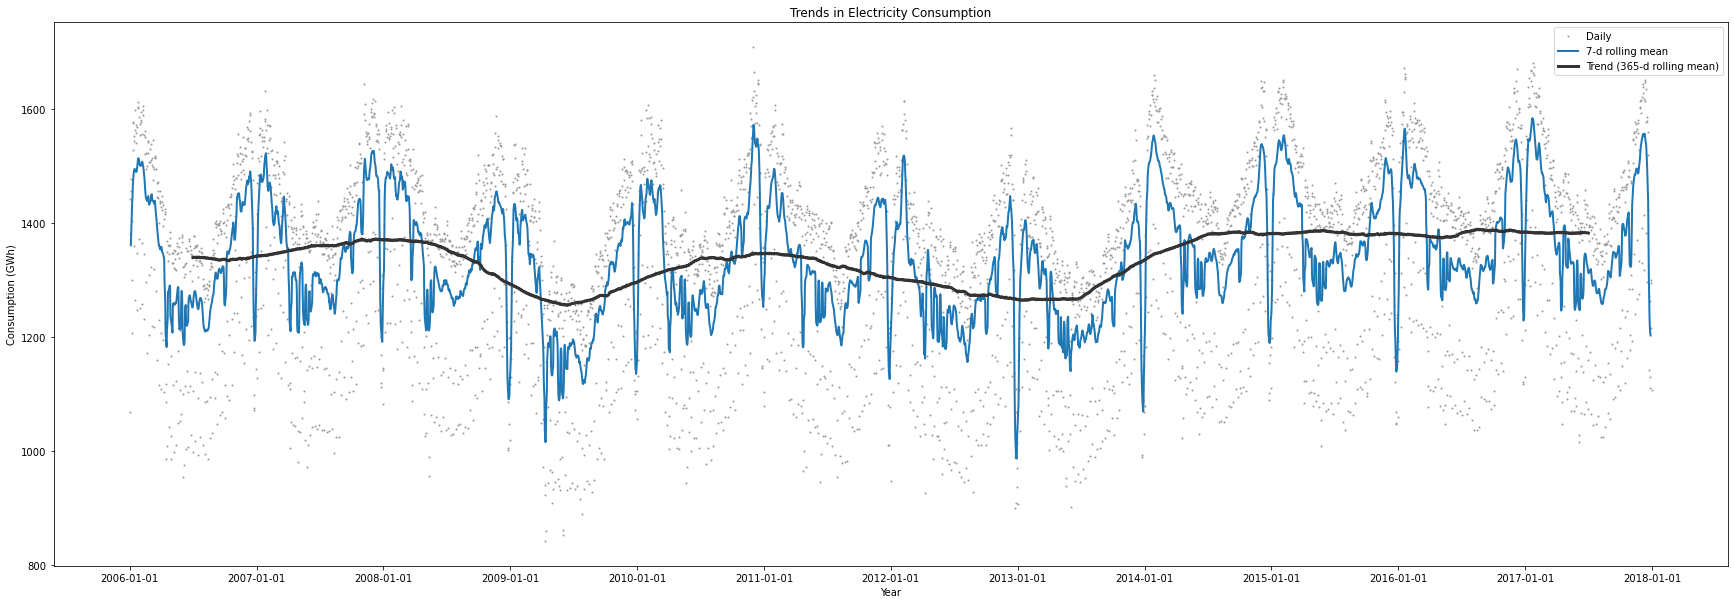

In [53]:
fig, ax = plt.subplots(figsize = (30,10))

#this should plot the daily values
ax.plot(data['Consumption'], marker = '.', markersize = 2, color = "0.6", linestyle = 'None', label = 'Daily')

#this should plot the 7 day rolling values
ax.plot(data_7d_roll['Consumption'], linewidth = 2, label = '7-d rolling mean')

#this should plot an annual roling data
ax.plot(data_365_roll['Consumption'], color = '0.2', linewidth = 3, label = 'Trend (365-d rolling mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

In [54]:
data_first_order_diff = data[data_columns].diff()

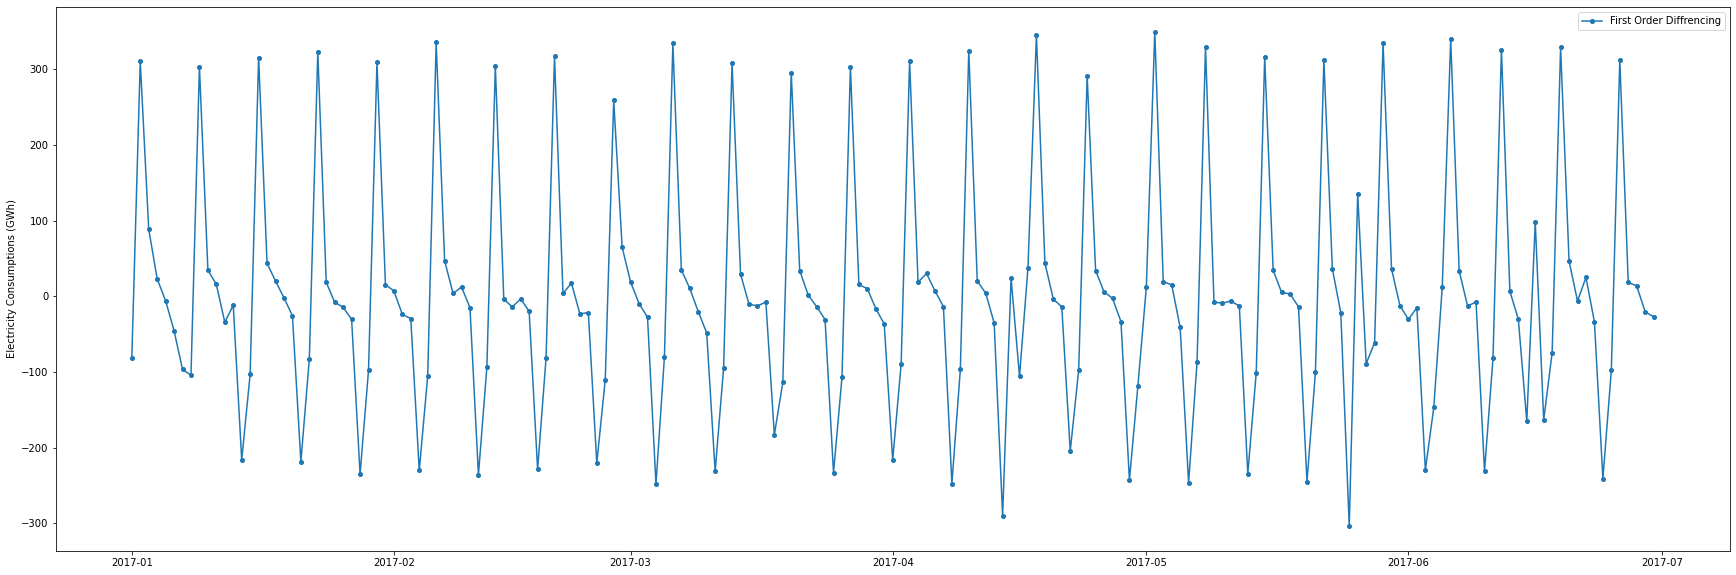

In [57]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots(figsize=(30,10))
ax.plot(data_first_order_diff.loc[start:end, 'Consumption'], marker = 'o', markersize = 4, linestyle = '-', label = "First Order Diffrencing")
ax.set_ylabel('Electricity Consumptions (GWh)')
ax.legend();

check for seasonality 

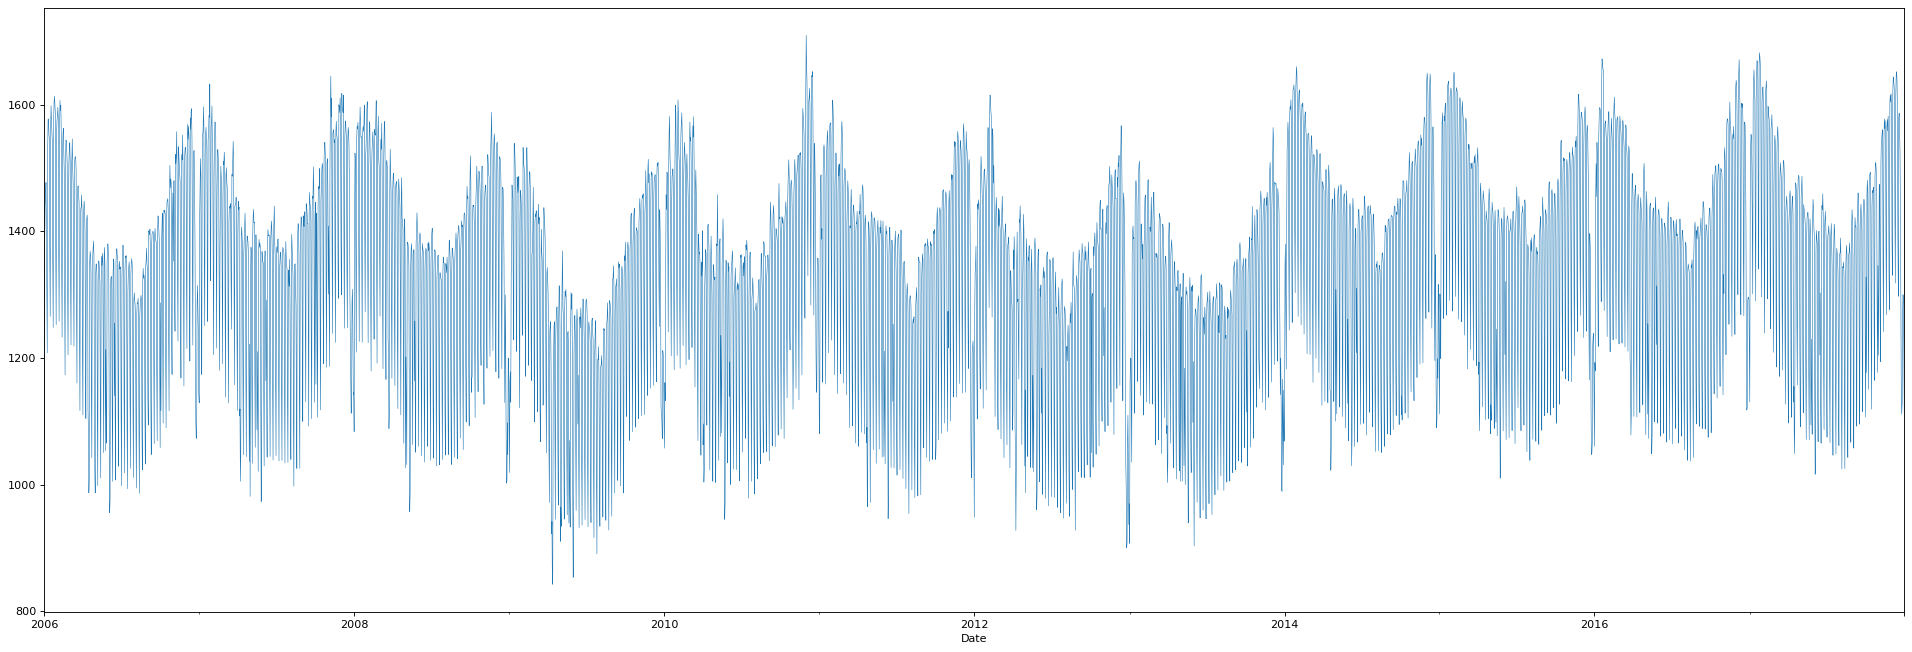

In [60]:
plt.figure(figsize = (30,10), dpi = 80)
data['Consumption'].plot(linewidth = 0.5)

when viewing the seasionality we can isolate it down to one year to see if there is weekly seasionality

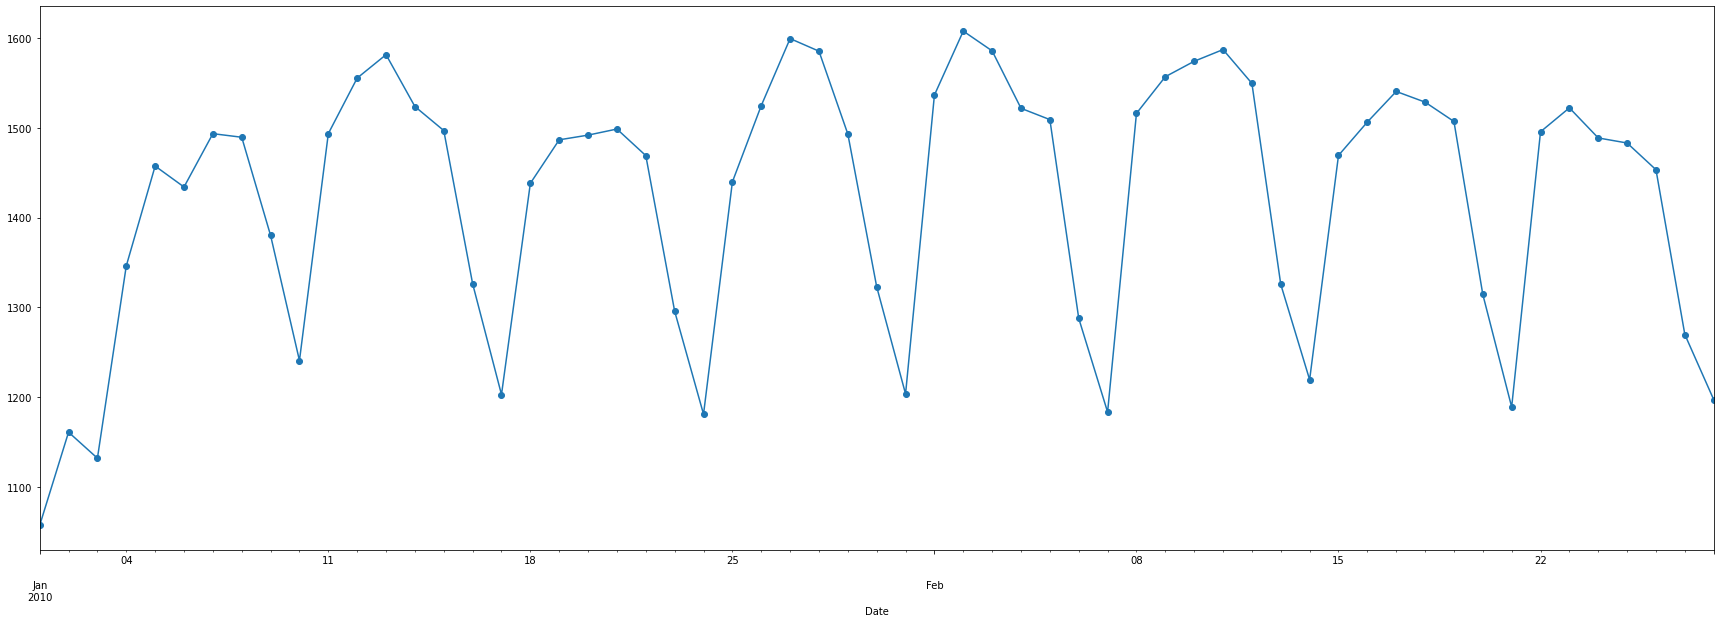

In [61]:
data.loc['2010-01':'2010-02', 'Consumption'].plot(marker = 'o', figsize = (30,10))

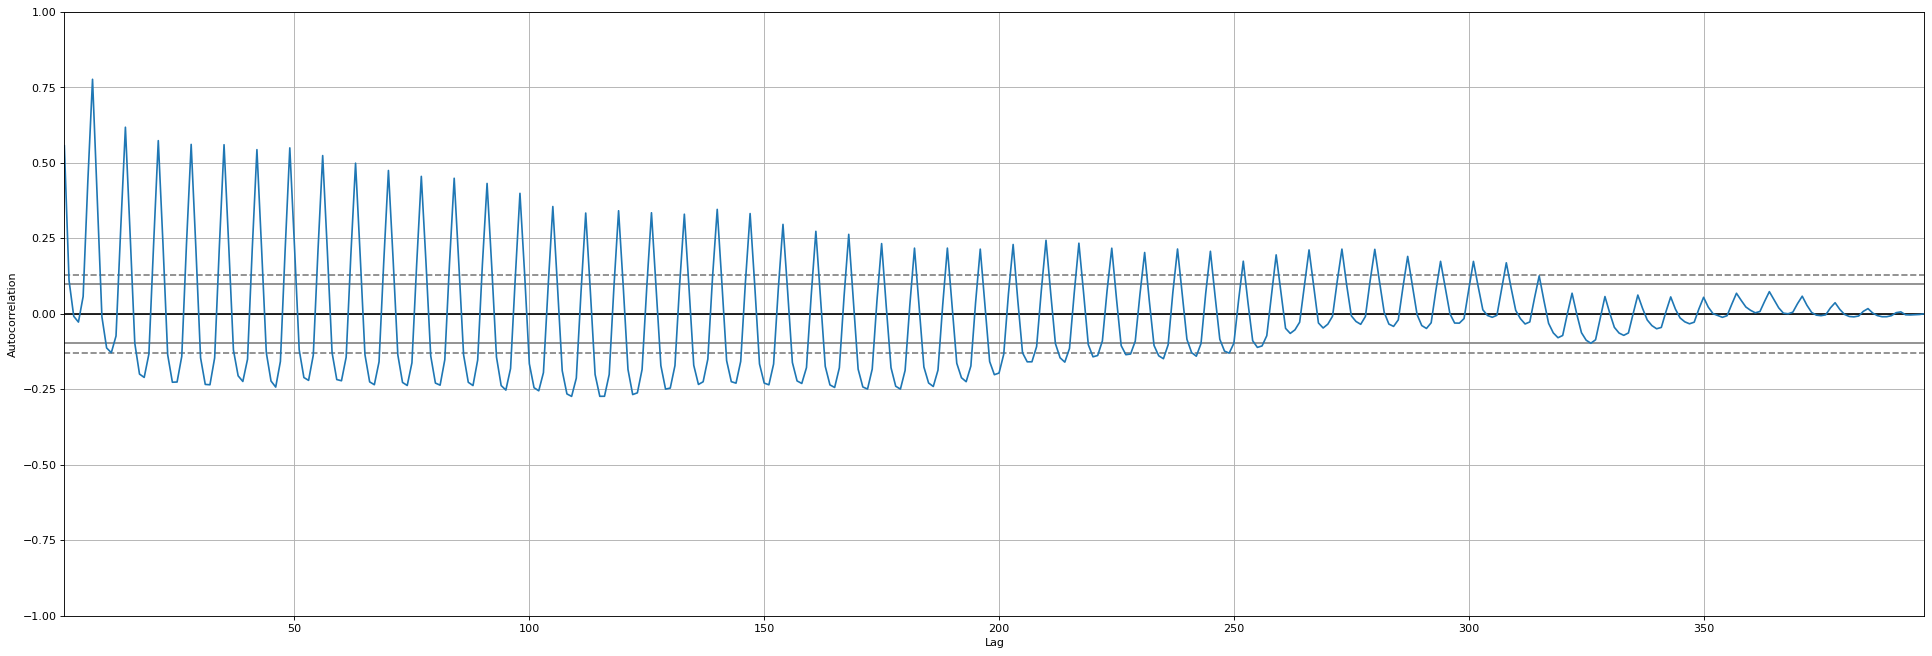

In [63]:
plt.figure(figsize = (30,10), dpi = 80)
pd.plotting.autocorrelation_plot(data.loc['2012-01':'2013-01', 'Consumption'])

this is for feature extraction

In [66]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday_name'] = data.index.weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

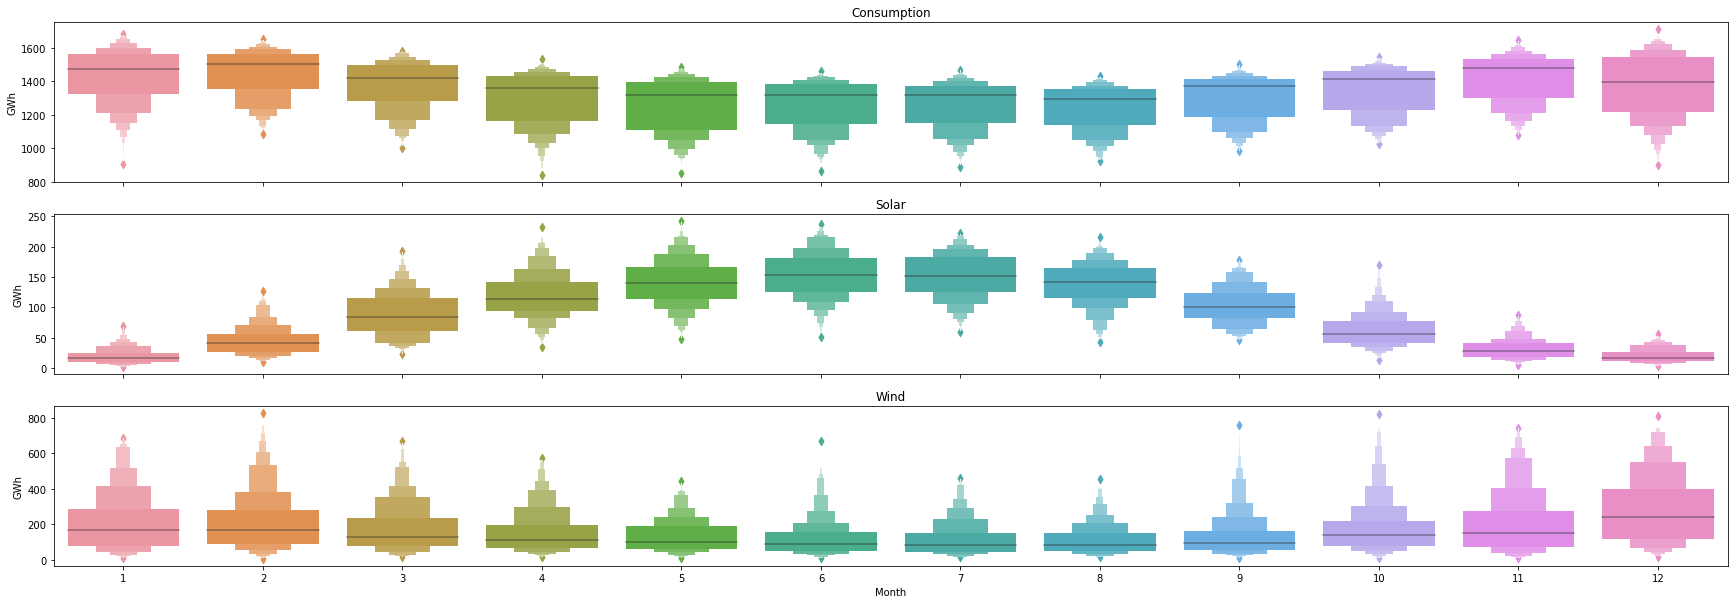

In [69]:
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize = (30,10), sharex = True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):

    sns.boxenplot(data = data, x = 'Month', y = name, ax = ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)

    if ax != axes[-1]:
        ax.set_xlabel('')